# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en estructuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
# Librerías estándar para arreglos y gráficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Primero importaremos datos desde un archivo con extensión `.csv`

In [2]:
#Importar datos de un archivo csv
datos_AAPL = pd.read_csv("AAPL.csv")
datos_AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-16,26.674999,27.557501,26.650000,27.497499,25.882893,235362000
1,2016-11-17,27.452499,27.587500,27.207500,27.487499,25.873484,110528000
2,2016-11-18,27.430000,27.635000,27.415001,27.514999,25.899368,113715600
3,2016-11-21,27.530001,27.997499,27.502501,27.932501,26.292355,117058400
4,2016-11-22,27.987499,28.105000,27.850000,27.950001,26.308825,103862000
...,...,...,...,...,...,...,...
1253,2021-11-09,150.199997,151.429993,150.059998,150.809998,150.809998,56787900
1254,2021-11-10,150.020004,150.130005,147.850006,147.919998,147.919998,65187100
1255,2021-11-11,148.960007,149.429993,147.679993,147.869995,147.869995,41000000
1256,2021-11-12,148.429993,150.399994,147.479996,149.990005,149.990005,63632600


In [3]:
datos_AAPL[['Volume', 'Close']]

,Volume,Close
0,235362000,27.497499
1,110528000,27.487499
2,113715600,27.514999
3,117058400,27.932501
4,103862000,27.950001
...,...,...
1253,56787900,150.809998
1254,65187100,147.919998
1255,41000000,147.869995
1256,63632600,149.990005


In [4]:
#Obtener columnas específicas del dataframe(tabla)

cols_interes = ['Date', 'Adj Close', 'Volume']

datos_filtrados = datos_AAPL[cols_interes]
datos_filtrados

,Date,Adj Close,Volume
0,2016-11-16,25.882893,235362000
1,2016-11-17,25.873484,110528000
2,2016-11-18,25.899368,113715600
3,2016-11-21,26.292355,117058400
4,2016-11-22,26.308825,103862000
...,...,...,...
1253,2021-11-09,150.809998,56787900
1254,2021-11-10,147.919998,65187100
1255,2021-11-11,147.869995,41000000
1256,2021-11-12,149.990005,63632600


In [5]:
# Obtener el nombre de las columnas del dataframe
datos_AAPL.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Tenemos que instalar pandas_datareader primero. Para ejecutamos en la terminal el siguiente comando:
> https://anaconda.org/anaconda/pandas-datareader

Ahora lo haremos desde Yahoo Finance

In [8]:
# Importar el modulo data del paquete pandas_datareader. 
# La comunidad lo importa con el nombre de web
import pandas_datareader.data as web

In [9]:
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

In [10]:
data_apple = web.DataReader('AAPL', 'yahoo', '1/1/2019', '11/16/2021')
data_apple['Adj Close']

Date
2019-01-02     38.168354
2019-01-03     34.366505
2019-01-04     35.833588
2019-01-07     35.753826
2019-01-08     36.435398
                 ...    
2021-11-10    147.310425
2021-11-11    147.260620
2021-11-12    149.371902
2021-11-15    149.381851
2021-11-16    150.377731
Name: Adj Close, Length: 726, dtype: float64

In [11]:
# Escribir una función para generalizar la importación desde Yahoo
def get_closes(names, start, end):
    data_closes = web.DataReader(names, 'yahoo', start, end)
    return data_closes['Adj Close']

In [15]:
# Instrumentos a descargar 
names = ['AMZN', 'SPOT', 'CEMEXCPO.MX', 'CUERVO.MX']

# Fechas: inicios 2017 a finales de 2020
start = '1/1/2017'
end = '12/31/2020'

In [16]:
# Obtenemos los precios ajustados en el cierre
data = get_closes(names, start, end)
data

Symbols,AMZN,SPOT,CEMEXCPO.MX,CUERVO.MX
Date,,,,
2017-01-02,NaN,NaN,15.502295,NaN
2017-01-03,37.683498,NaN,15.502295,NaN
2017-01-04,37.859001,NaN,15.933435,NaN
2017-01-05,39.022499,NaN,15.952180,NaN
2017-01-06,39.799500,NaN,15.952180,NaN
...,...,...,...,...
2020-12-24,158.634506,328.390015,10.250000,49.154064
2020-12-28,164.197998,317.290009,10.320000,49.438931
2020-12-29,166.100006,318.429993,10.260000,49.409462


¿Cómo lucen estos datos?

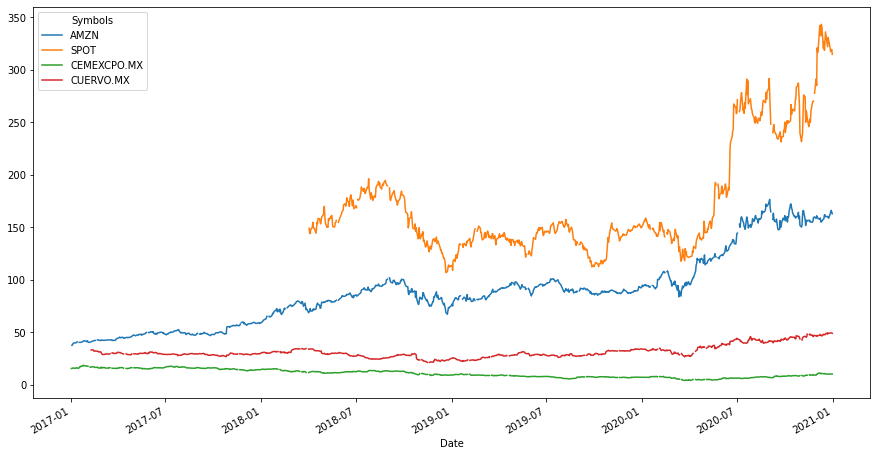

In [17]:
# Graficar
data.plot(figsize=(15,8))
plt.show()

<AxesSubplot:xlabel='Date'>

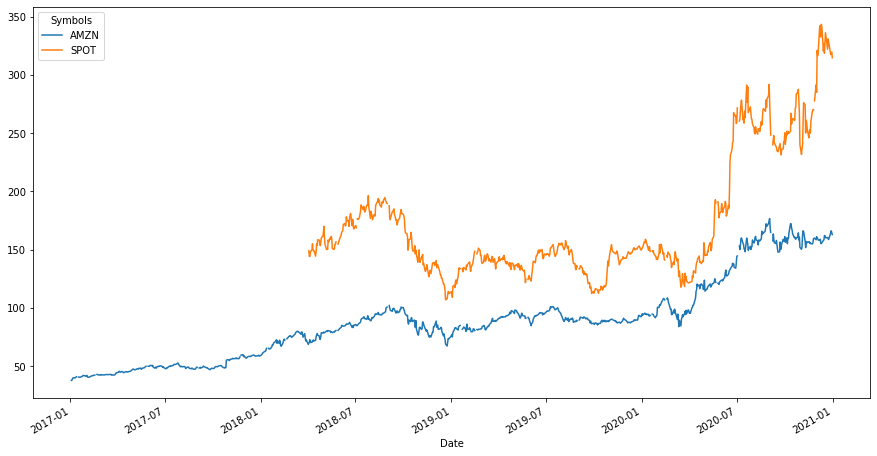

In [18]:
data_US = data[['AMZN', 'SPOT']]
data_MX = data[['CEMEXCPO.MX', 'CUERVO.MX']]

data_US.plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

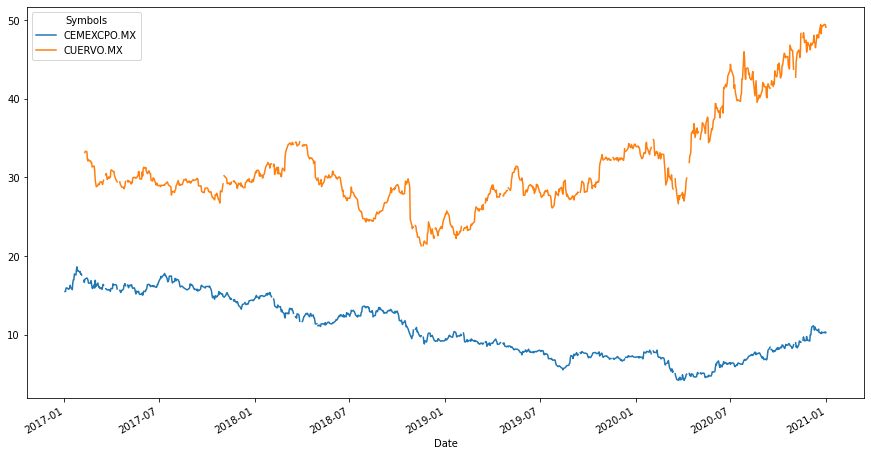

In [19]:
data_MX.plot(figsize=(15,8))

array([[<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'SPOT'}>],
       [<AxesSubplot:title={'center':'CEMEXCPO.MX'}>,
        <AxesSubplot:title={'center':'CUERVO.MX'}>]], dtype=object)

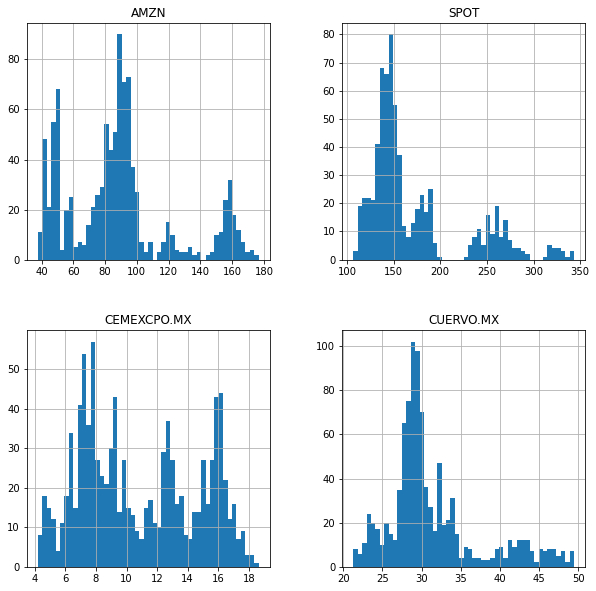

In [22]:
data.hist(bins=50, figsize=(10,10))

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [20]:
# Método describe
data.describe()

Symbols,AMZN,SPOT,CEMEXCPO.MX,CUERVO.MX
count,1007.000000,694.000000,1005.000000,978.000000
mean,88.590626,172.100476,10.813457,31.394328
std,34.019376,52.741067,3.781079,6.014349
min,37.683498,106.839996,4.210000,21.304489
25%,60.000750,138.627506,7.570000,28.064111
50%,87.481003,149.679993,9.932715,29.586378
75%,96.950249,186.099995,14.406825,33.110404
max,176.572495,343.299988,18.632746,49.438931


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1033 entries, 2017-01-02 to 2020-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AMZN         1007 non-null   float64
 1   SPOT         694 non-null    float64
 2   CEMEXCPO.MX  1005 non-null   float64
 3   CUERVO.MX    978 non-null    float64
dtypes: float64(4)
memory usage: 40.4 KB


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}=\frac{S_t}{S_{t-1}}- 1
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [28]:
data.head(4)

Symbols,AMZN,SPOT,CEMEXCPO.MX,CUERVO.MX
Date,,,,
2017-01-02,NaN,NaN,15.502295,NaN
2017-01-03,37.683498,NaN,15.502295,NaN
2017-01-04,37.859001,NaN,15.933435,NaN
2017-01-05,39.022499,NaN,15.952180,NaN


In [27]:
# Método shift
data.shift().head(4)

Symbols,AMZN,SPOT,CEMEXCPO.MX,CUERVO.MX
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,15.502295,NaN
2017-01-04,37.683498,NaN,15.502295,NaN
2017-01-05,37.859001,NaN,15.933435,NaN


<AxesSubplot:xlabel='Date'>

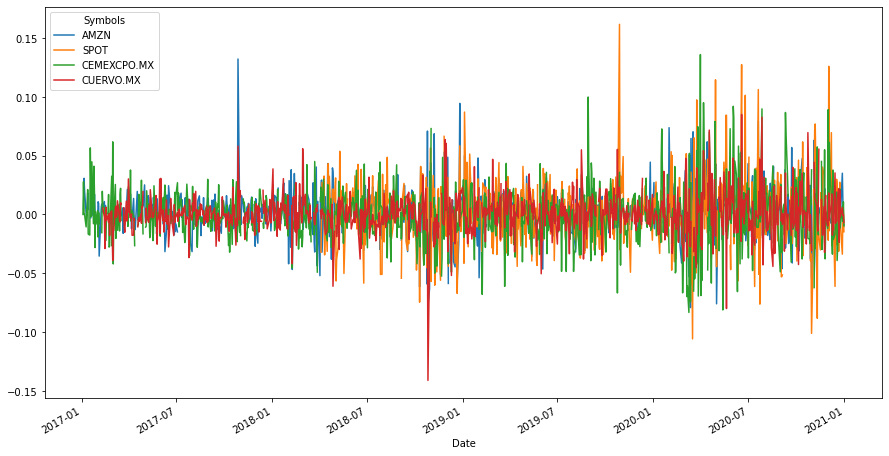

In [29]:
# Entonces los rendimientos se calculan como
data_ret = (data - data.shift())/data.shift()

data_ret.plot(figsize=(15, 8))

In [30]:
# Método pct_change (Este método es exactamente igual a la ecuación de la celda anterior)
data_ret_2 = data.pct_change()
data_ret_2

Symbols,AMZN,SPOT,CEMEXCPO.MX,CUERVO.MX
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,0.000000,NaN
2017-01-04,0.004657,NaN,0.027811,NaN
2017-01-05,0.030732,NaN,0.001176,NaN
2017-01-06,0.019912,NaN,0.000000,NaN
...,...,...,...,...
2020-12-24,-0.003949,-0.007255,-0.011572,-0.001994
2020-12-28,0.035071,-0.033801,0.006829,0.005795
2020-12-29,0.011584,0.003593,-0.005814,-0.000596


y la gráfica de los rendimientos se puede obtener como...

<AxesSubplot:xlabel='Date'>

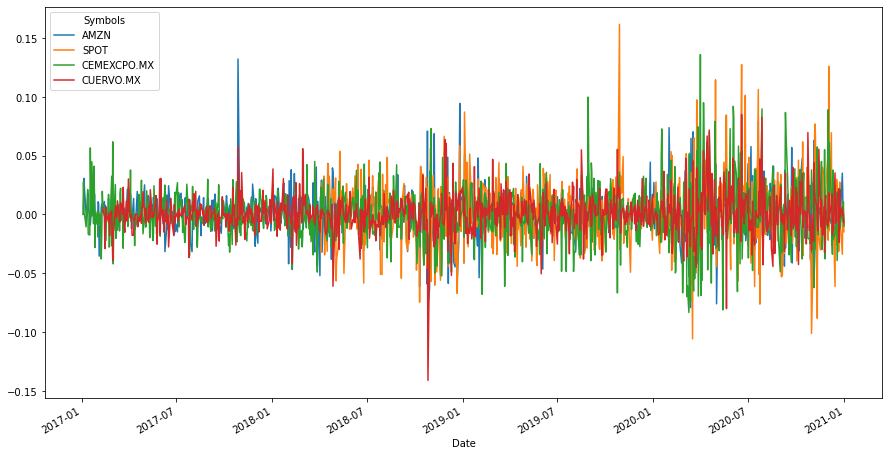

In [31]:
# Gráfica
data_ret_2.plot(figsize=(15, 8))

In [32]:
data_ret_2.describe()
# data_ret_2.mean()

Symbols,AMZN,SPOT,CEMEXCPO.MX,CUERVO.MX
count,1031.000000,710.000000,1032.000000,1004.000000
mean,0.001601,0.001448,-0.000126,0.000533
std,0.019054,0.028260,0.023445,0.016868
min,-0.079221,-0.105807,-0.083333,-0.141106
25%,-0.006447,-0.014540,-0.012399,-0.007177
50%,0.001340,0.000790,0.000000,0.000000
75%,0.010487,0.016384,0.011302,0.008025
max,0.132164,0.161654,0.135945,0.085025


array([[<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'SPOT'}>],
       [<AxesSubplot:title={'center':'CEMEXCPO.MX'}>,
        <AxesSubplot:title={'center':'CUERVO.MX'}>]], dtype=object)

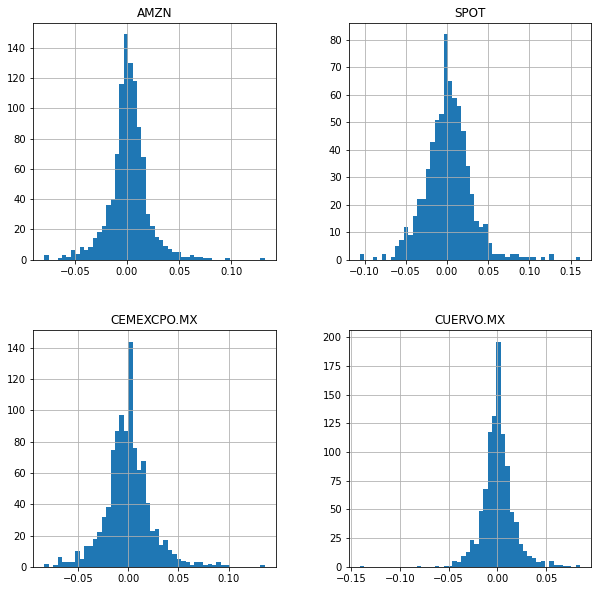

In [33]:
data_ret_2.hist(bins=50, figsize=(10,10))

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

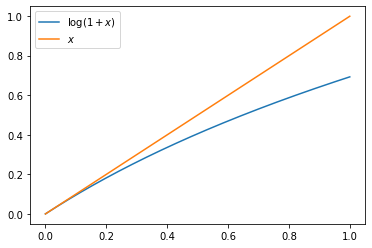

In [35]:
x = np.arange(0, 1, 0.001)
y1 = np.log(x + 1)
y2 = x

plt.plot(x, y1, label='$\log(1+x)$')
plt.plot(x, y2, label='$x$')
plt.legend()
plt.show()

In [36]:
# Rendimiento logarítmico
data_ret_log = np.log(data/data.shift())
data_ret_log

Symbols,AMZN,SPOT,CEMEXCPO.MX,CUERVO.MX
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,0.000000,NaN
2017-01-04,0.004646,NaN,0.027432,NaN
2017-01-05,0.030270,NaN,0.001176,NaN
2017-01-06,0.019716,NaN,0.000000,NaN
...,...,...,...,...
2020-12-24,-0.003957,-0.007282,-0.011639,-0.001996
2020-12-28,0.034470,-0.034386,0.006806,0.005779
2020-12-29,0.011517,0.003586,-0.005831,-0.000596


<AxesSubplot:xlabel='Date'>

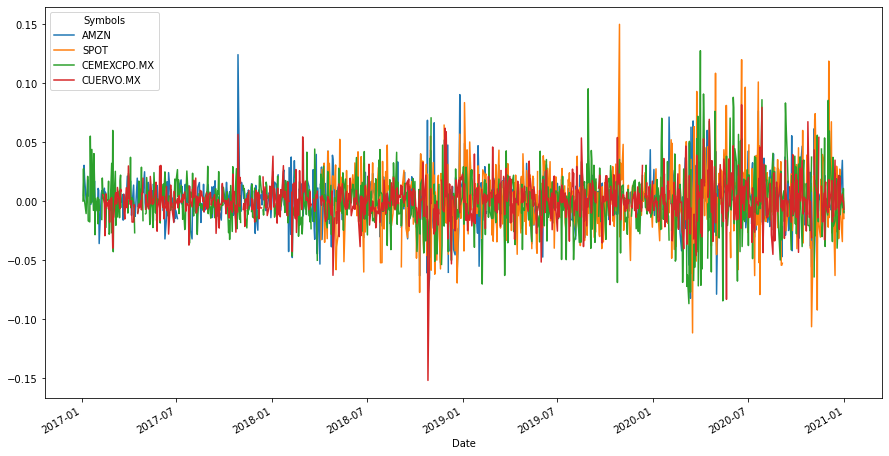

In [37]:
# Gráfica
data_ret_log.plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

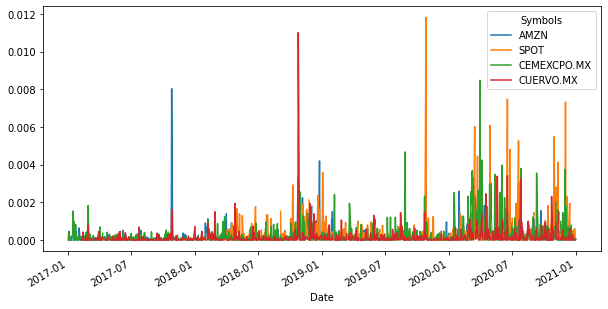

In [41]:
# Valor absoluto de la diferencia
np.abs(data_ret_log - data_ret_2).plot(figsize=(10,5))

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los rendimientos son normales...

In [42]:
# Media (promedio) y volatilidad de rendimientos
data.mean() # Promedio de los precios

Symbols
AMZN            88.590626
SPOT           172.100476
CEMEXCPO.MX     10.813457
CUERVO.MX       31.394328
dtype: float64

In [43]:
data_ret_log.mean() # Promedio de los rendimientos logarítmicos

Symbols
AMZN           0.001401
SPOT           0.001139
CEMEXCPO.MX   -0.000362
CUERVO.MX      0.000211
dtype: float64

In [44]:
# Desviación estándar (volatilidad)
data.std()   # Desviación estándar de los precios

Symbols
AMZN           34.019376
SPOT           52.741067
CEMEXCPO.MX     3.781079
CUERVO.MX       6.014349
dtype: float64

In [45]:
data_ret_log.std()  # Volatilidad de los rendimientos logarítmicos

Symbols
AMZN           0.019223
SPOT           0.028548
CEMEXCPO.MX    0.023637
CUERVO.MX      0.016954
dtype: float64

In [62]:
ret_desv = data_ret_log.std()
ret_desv[['AMZN', 'SPOT']]

Symbols
AMZN    0.019223
SPOT    0.028548
dtype: float64

<AxesSubplot:xlabel='Date'>

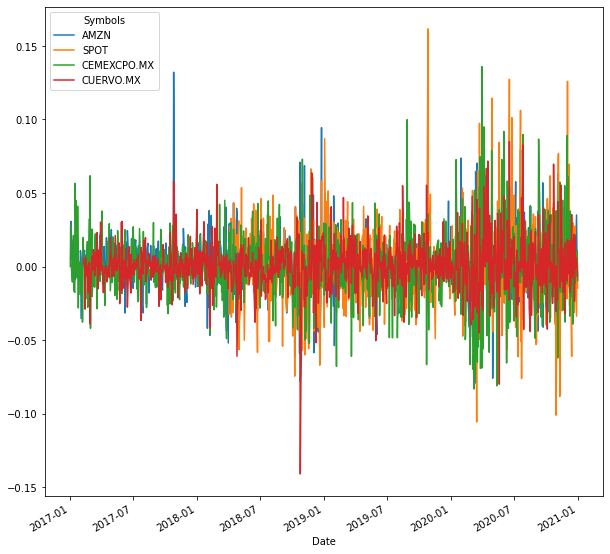

In [46]:
data_ret_2.plot(figsize=(10,10))

<AxesSubplot:xlabel='Date'>

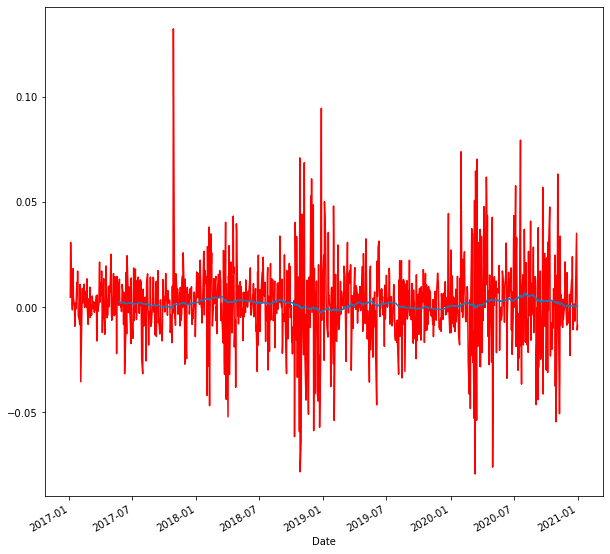

In [52]:
data_ret_2['AMZN'].plot(figsize=(10,10), color='r')
data_ret_2['AMZN'].rolling(100).mean().plot(figsize=(10,10))

<AxesSubplot:xlabel='Date'>

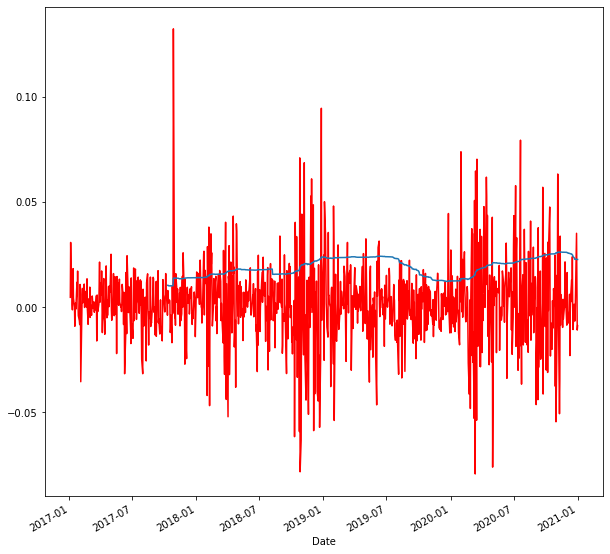

In [54]:
data_ret_2['AMZN'].plot(figsize=(10,10), color='r')
data_ret_2['AMZN'].rolling(200).std().plot(figsize=(10,10))

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario en media normal (gaussiana).

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>